In [3]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, mean_squared_error
)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy import stats
from tabulate import tabulate
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.set_option('display.max_columns', None)

# US Dataset
US_data = pd.read_csv('/Users/mahnooriqbal/COMP702 Project/ML-AI-Risk-Analysis-AV-Data-/Datasets/US-cleaned_data.csv')

In [5]:
# Identify numerical and categorical columns
numerical_columns = ['Posted Speed Limit (MPH)']
categorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 'Country'
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

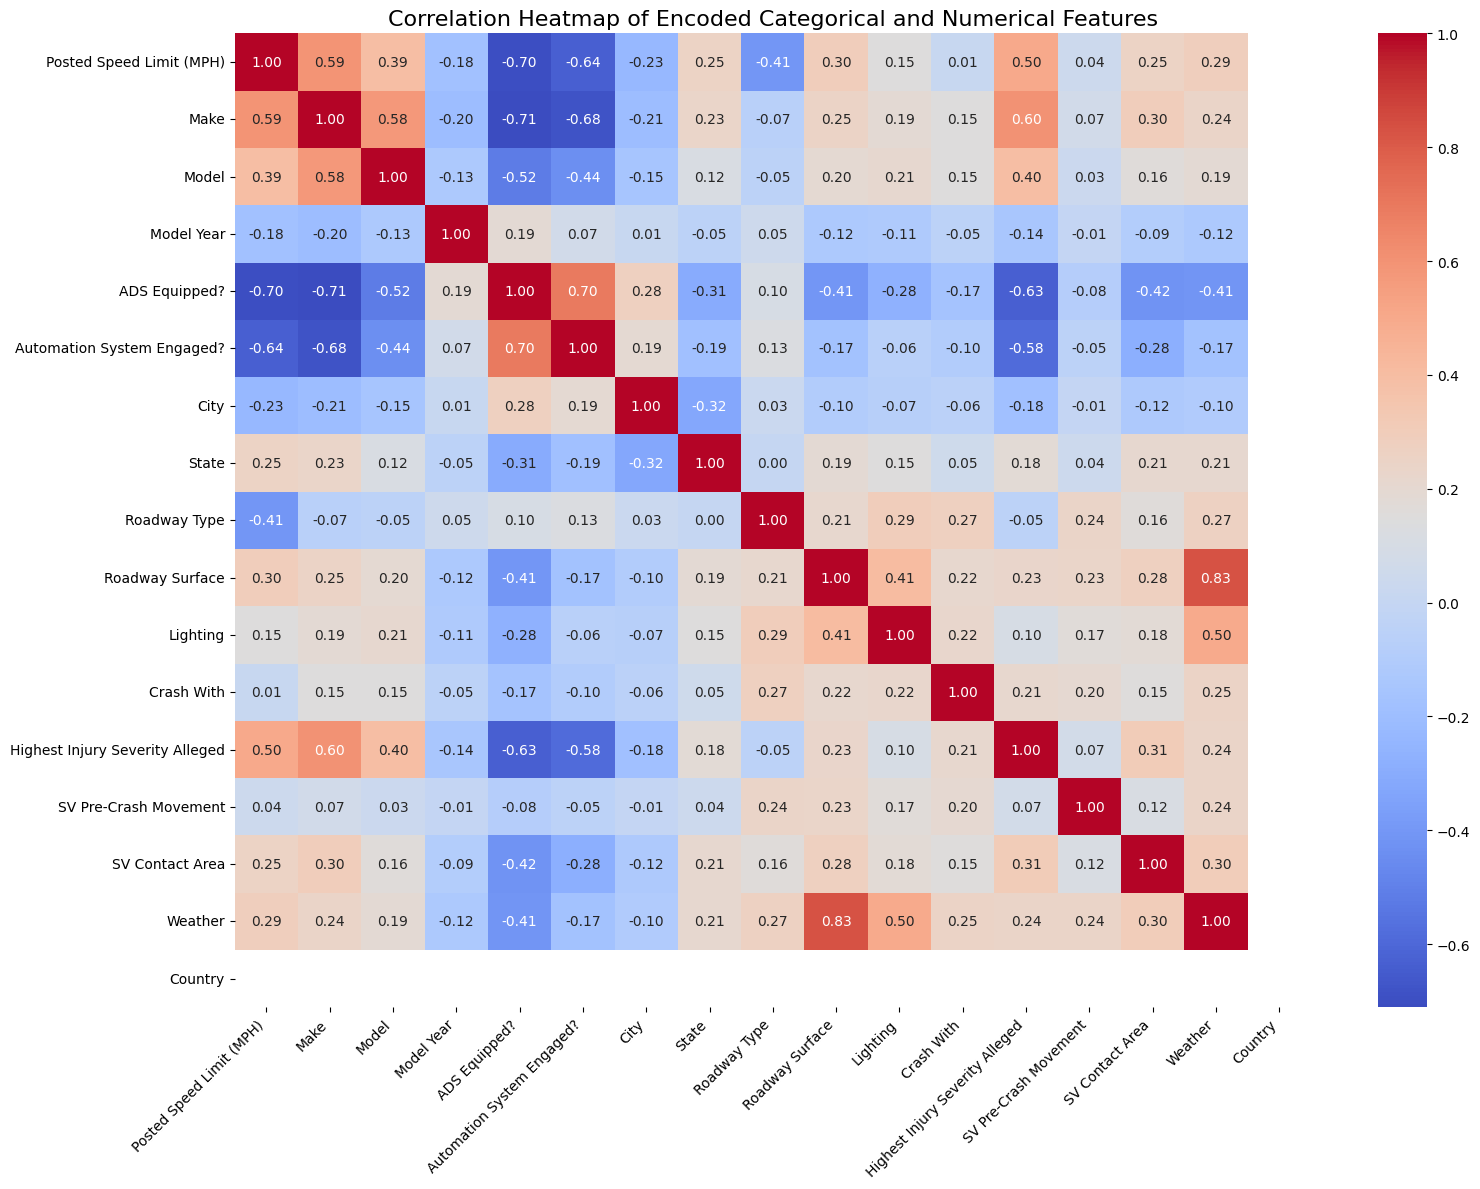

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# === Load your dataset ===
# Replace with your actual file path or DataFrame
# Example: df = pd.read_csv('your_data.csv')
df = US_data

# === Define column groups ===
numerical_columns = ['Posted Speed Limit (MPH)']
categorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 'Country'
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

# === Encode categorical columns ===
df_encoded = df.copy()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# === Select relevant columns for heatmap ===
heatmap_columns = numerical_columns + categorical_columns
df_heatmap = df_encoded[heatmap_columns]

# === Plot heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Encoded Categorical and Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


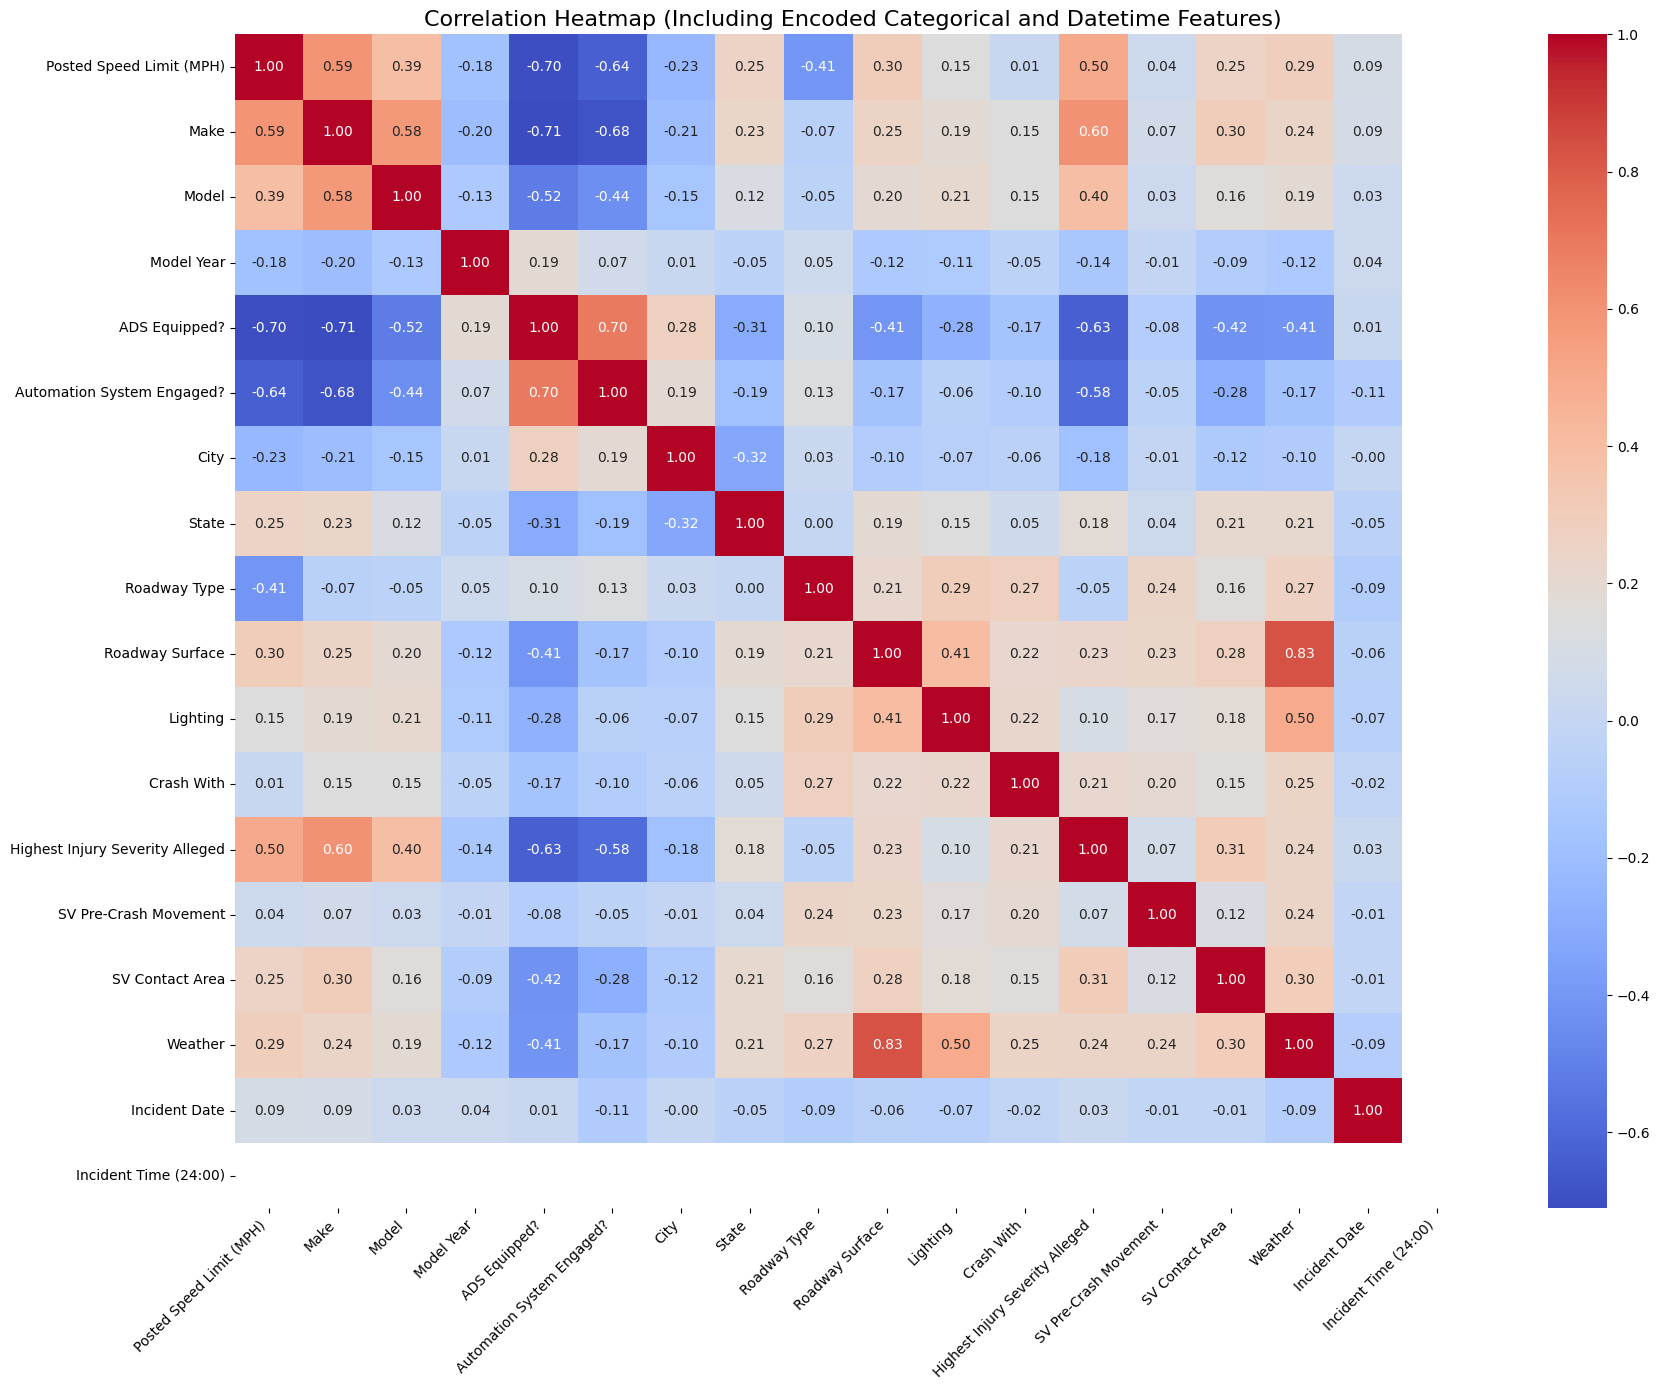

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# === Load your dataset ===
# Example: df = pd.read_csv('your_data.csv')


# === Define column groups ===
numerical_columns = ['Posted Speed Limit (MPH)']
categorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

# === Copy and preprocess dataframe ===
df_encoded = df.copy()

# --- Convert datetime columns to numeric ---
# Convert 'Incident Date' to datetime and then to timestamp
df_encoded['Incident Date'] = pd.to_datetime(df_encoded['Incident Date'], errors='coerce')
df_encoded['Incident Date'] = df_encoded['Incident Date'].astype('int64') // 10**9  # Unix timestamp in seconds

# Convert 'Incident Time (24:00)' to time and then seconds since midnight
df_encoded['Incident Time (24:00)'] = pd.to_datetime(
    df_encoded['Incident Time (24:00)'], format='%H:%M', errors='coerce'
).dt.hour * 3600 + pd.to_datetime(
    df_encoded['Incident Time (24:00)'], format='%H:%M', errors='coerce'
).dt.minute * 60

# --- Encode categorical columns ---
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# === Combine all relevant columns ===
heatmap_columns = numerical_columns + categorical_columns + datetime_columns
df_heatmap = df_encoded[heatmap_columns]

# === Plot the heatmap ===
plt.figure(figsize=(18, 14))
sns.heatmap(df_heatmap.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Including Encoded Categorical and Datetime Features)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


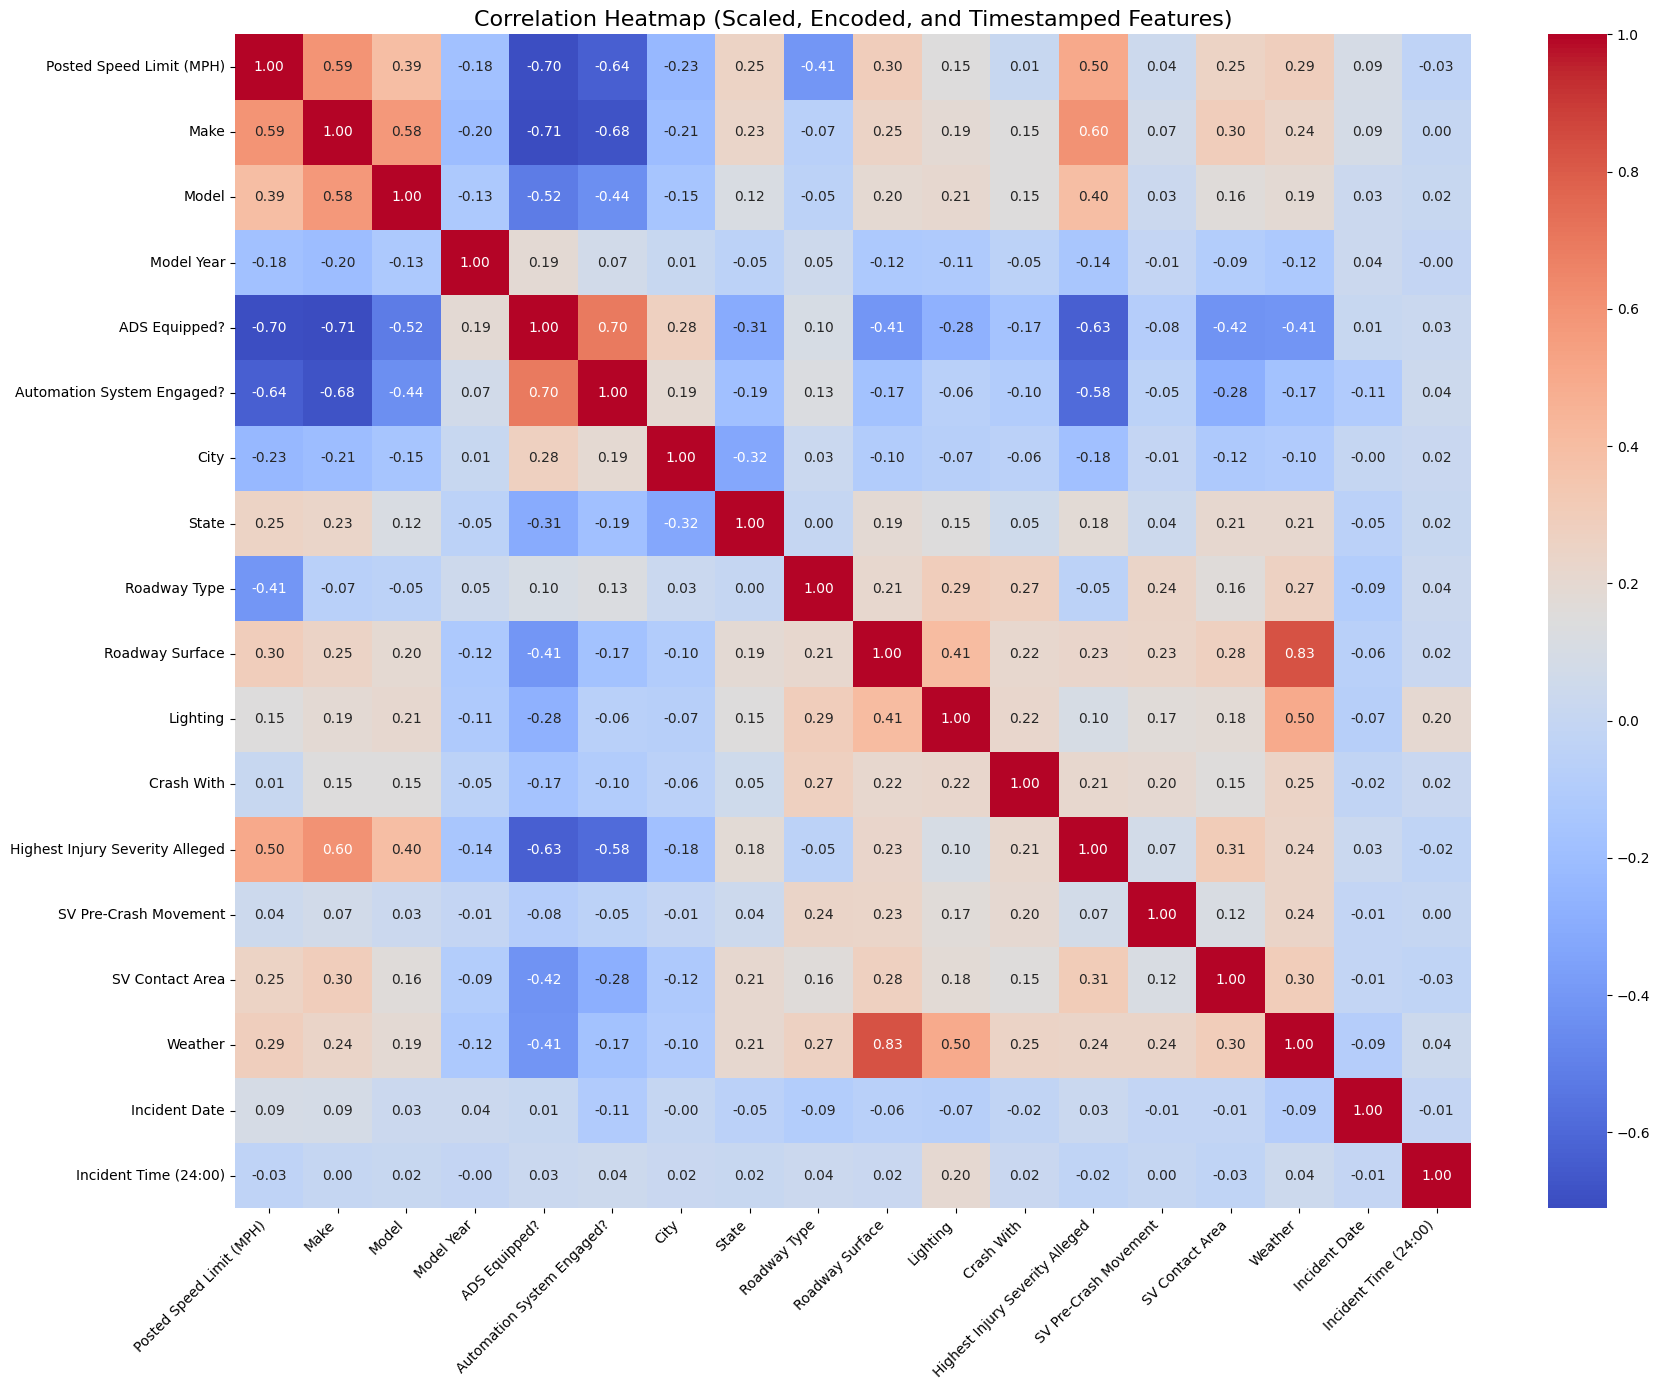

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# === Define column groups ===
numerical_columns = ['Posted Speed Limit (MPH)']
categorical_columns = [
    'Make', 'Model', 'Model Year', 'ADS Equipped?',
    'Automation System Engaged?', 'City', 'State', 'Roadway Type', 'Roadway Surface',
    'Lighting', 'Crash With', 'Highest Injury Severity Alleged',
    'SV Pre-Crash Movement', 'SV Contact Area', 'Weather', 
]
datetime_columns = ['Incident Date', 'Incident Time (24:00)']
indexing_columns = ['Report ID', 'Report Version']

# === Copy and preprocess dataframe ===
df_encoded = df.copy()

# --- Convert datetime columns to numeric ---
df_encoded['Incident Date'] = pd.to_datetime(df_encoded['Incident Date'], errors='coerce')
df_encoded['Incident Date'] = df_encoded['Incident Date'].astype('int64') // 10**9  # Unix timestamp

# Correct time parsing for format with seconds
if 'Incident Time (24:00)' in df_encoded.columns:
    time_parsed = pd.to_datetime(df_encoded['Incident Time (24:00)'], format='%H:%M:%S', errors='coerce')
    df_encoded['Incident Time (24:00)'] = (
        time_parsed.dt.hour * 3600 +
        time_parsed.dt.minute * 60 +
        time_parsed.dt.second
    )

# --- Encode categorical columns ---
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le

# === Select relevant columns ===
heatmap_columns = numerical_columns + categorical_columns + datetime_columns
df_heatmap = df_encoded[heatmap_columns]

# --- MinMax Scaling ---
scaler = MinMaxScaler()
df_heatmap_scaled = pd.DataFrame(scaler.fit_transform(df_heatmap), columns=heatmap_columns)

# === Plot the heatmap ===
plt.figure(figsize=(18, 14))
sns.heatmap(df_heatmap_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Scaled, Encoded, and Timestamped Features)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
